## 3. Regression: Optimization of Long-Term Correction of Wind Data Using Regression Models

**Assignment Description**

In this assignment, you will work with realistic data from the wind industry. Vestas, a leading global company in wind energy, is interested in optimizing their methods for generating long-term corrected (LTC) wind data, which are used for planning the locations of new wind farms.

**Context**

Before building a new wind farm, Vestas needs to get an estimate of how much power it can produce. This can be done by running a simulation of the planned wind farm. The primary factors that decide how much power will be produced are: 

-  the turbine type (bigger turbines generally produce more energy), 

- the locations of the turbines (more energy is produced if the turbines are placed so that they do not block each other significantly) and 

- the wind speed and wind direction at the location where the wind farm is planned to be build. 

The turbine type and location is something that Vestas engineers get to decide, but wind is not so easily managed... Therefore, it is important to have a large amount of data to get a precise description of the distribution of wind speeds and wind directions at the potential site. Ideally a wind measuring mast would be build at the place of interest and collect data on wind speeds and wind directions for 20 years or so prior to the wind farm being build. However, the investers would probably become impatient if they had to wait for 20 years before construction could begin. 

So instead, a mast is build that collects data for a few years (typically 1-4 years). To account for more "global" variations in wind from year to year (some years are simply more windy than other years), the data from the mast is then compared to the data based on wind models which covers a much longer time scale. This model data (referred to as "meso" data) can be obtained for any location on Earth, and accounts for large scale wind variations (e.g. due to seasons, geography, Coriolis effect etc.). But it cannot be expected to give a precise description of the wind at a specific location, which is also affected by vegetation, buildings, the local landscape and so on. So in summary, the mast data captures the specific wind conditions for the given site, and the meso data accounts for variations in wind speeds on a longer time scale. Together, the two datasets usually give a good description of the wind at a specific site over a long time period, and therefore can be used to predict the expected power production over a long time span (e.g. 20 years, comparable to the life time of a wind farm).

Below is an illustration comparing a meso and a mast time series. Note that this plot is only for illustration purposes. In reality, meso data typically has a frequency of 1 hour, and mast data has a frequency of 10 minutes. Besides, the figure only illustrates the variations in windspeeds. For the actual simulations, wind directions are also extremely important (e.g. to determine the locations of the turbines such that they don't block each other for the prevalent wind directions).

![Illustration of meso vs mast time series](timeseries_example.png)

In order to run a simulation for a given (potential) site, Vestas needs to obtain a single time series which has the same characteristics as the mast timeseries, but has a time span of 20 years like the meso time series. For this purpose, they currently use a neural network: They train the network on the overlapping parts of the mast and meso time series. Specifically, they train the network to be able to predict the mast wind speeds and wind directions based on the wind speeds and wind directions found in the meso data for the same time stamps. After the neural network has been trained, they feed the meso wind speeds and wind directions for the entire 20 years time span to get a *predicted* "mast" time series covering the 20 years of data found in the meso data. This *predicted* mast time series is called the "long term corrected" (LTC) time series, and is the one on which they base their simulations for the power production at the given site. 

However, traning neural networks is time consuming and expensive! Therefore, Vestas is curious if some kind of linear regression would be able to acheive comparable results. 

**Data**
 
You will have access to two types of time series data:

1) Mast time series data that represent the wind conditions at a specific location based on measurements from a wind measuring mast.

2) Meso time series data that are based on weather measurement models and cover more than 20 years. While these data are less precise and don't exactly match the specific location, they provide a longer historical context.

Note that the mast data for this project is significantly longer than "typical" mast data. This allows cutting the data into training and test sets (or training, validation and test sets). Each set should cover all four seasons.

Your task is to develop a model using regression techniques that can generate LTC wind data. This LTC time series should be long, like the meso time series, but also give an accurate description of the wind conditions at the specific location.

**Objectives and Purpose**
 
The purpose of the assignment is to assess whether regression could be used instead of neural networks, which could potentially save time and money as it is generally quicker to perform a regression than to train a neural network. And the main objective is thus to develop a regression model that can generate LTC time series that are both accurate and cost-effective.

**Requirements**

Please note. We have supplied some examples of how students have previously done the preprocessing to give you some input and thus make the work load a bit less. Feel free to use/reuse the preprocessing steps of these solutions.

1. **Data preprocessing:** You must handle large datasets and perform necessary data preprocessing tasks. This includes dealing with missing values, handling outliers, and scaling data appropriately for the chosen regression technique. Feel free to use or get inspired by previous solutions.

    a. Consider the appropriate intervals for wind speeds and wind directions. No negative wind speeds are allowed, and wind directions should be in an appropriate interval (e.g. [0; 360[ degrees).

    b. Select which ws / wd signals to use. Signals at higher altitude are generally better, but it is even more important to have proper coverage of all seasons.

    c. Find the meso-signals closest in height to the mast-data-signal you are using. Or interpolate the values between 2 or more meso-signals to get the values at the exact mast-signal-height.

    d. Convert the mast data from DK time to UTC time (corresponding to the time zone used in the meso data). Remember to account for summer-time in DK.
    
    e. Resample the mast dataset to have the same frequency as the meso data. The meso data has one record for each hour, the mast data has one record for each 10 min.

        i. Note: You should not convert the ws / wd signals to vector-quantities and use those for the resampling. Resample the ws and wd signal individually instead. The turbines “yaw” to always point toward the incoming wind, so the interesting value is the wind speed and not the wind velocity.  
        ii. Be careful when resampling the wind directions. You don’t want the average of 0 degrees and 359 degrees to become ~180 degrees :-)

    f. Find the overlapping timestamps between the meso data and the resampled mast data. You only want to consider data in this overlapping time period in your training.

2. **Optional: Exploratory analysis:** You may do an exploratory analysis of the data, but this part is not mandatory. This includes presenting the data in tables and graphs, study and describe features of interest, as well as correlation analysis. Wind speeds typically follow a Weibull-distributions. Try fitting a Weibull distribution to the mast data, the resampled mast data and the meso-data. **(You can skip this part if you want to)**
3. **Model Development:** Use appropriate machine learning principles and methodologies, including model training and testing and perhaps validation, cross-validation, and leave-one-out. You should apply and interpret regression models effectively for this task.
4. **Model Evaluation:** Evaluate the developed model using appropriate metrics such as Mean Squared Error (MSE), R-squared (R²), etc. The evaluation should give an indication of the usefulness of your model in predicting wind conditions accurately. 
**Optional**: If you did step 2 above, in addition to calculating the above metric for your predicted time series, also consider comparing the distributions of the wind speeds in the predicted and the actual (resampled) mast data. That is, calculate the Weibull A- and k-parameters for both distributions, and find the error in these between your fit and the true data. "Error-in-A" and "Error-in-k" are the most used quantities to evaluate the long term correction process in the wind industry :-)
5. **Documentation and Presentation:** Clearly document the steps, methodologies, and tools you used during the process. Present the results of your model in a clear and effective manner. This documentation should be comprehensive enough for someone to replicate your process and understand your results. Hand-in as one Jupyter Notebook.


**Some additional comments**

They (Vestas) have also tried running their own LTC algorithm on some of the data (they chose the 77m wind speed and wind direction signals from the Risø dataset), and this yielded good results. They assumed that the data was in Danish time, so they believe that is the case.

As you can see, there is quite a focus on wind speeds (as they determine the amount of power produced). However, they know that their neural network operates by training on the different components of wind speed separately (meaning training one network on the x-component of the wind and another network on the y-component of the wind) and then combining them at the end. You may consider this method too. They are not sure if it yields better performance than training on wind speed and wind direction separately...but if time permits, give it a go.

**About the data**

The mast datasets are in netCDF format. It's quite easy to work with in Python (not sure if you've used it before?). In one of the folders, a test.py file is included that demonstrate how to load the dataset and access the most relevant mast signals.

The mast data has a measurement frequency of 10 minutes, while the meso data has a frequency of 1 hour. Therefore, you will need to resample the mast data to a 1-hour frequency before you can use it (see requirement 1.e above). Vestas does the same with their data. As mentioned you should be careful when resampling the angles so that the average of 0 degrees (north) and 359 degrees doesn't end up being approximately 180 degrees.

The data is publicly available. You can read more about it here:

*Risø:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/risoe_m.md

Data: https://data.dtu.dk/articles/dataset/Wind_resource_data_from_the_tall_Ris_met_mast/14153204 (this is the "DOI"-link from the description)


*Børglum:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/borglum.md

Data: https://data.dtu.dk/articles/dataset/Resource_data_from_the_Borglum_mast/14153231

The two meso datasets come from Vestas' climate library, and the meso data is in UTC time. They don't think you need anything other than the "wind speed" (WSP) and "wind direction" (WDIR) signals. They believe it's most appropriate to either use the height closest to the mast height (for example, if you're using the wind speed signal ws125 and the wind direction signal wd125 from the Risø dataset, you should use WSP120 and WDIR120 from the meso dataset) or use multiple signals and interpolate to the desired height (125m) (see the requirements above).

**Final comments**

In a perfect world, you can do all of the above. The assignment is "free" in the sense that you should give the above a go and do your best. Remember, there is no right answer. This assignment is a real-world machine learning task and not a "made-up" school task. There are software engineers at Vestas working on exactly the same task (albeit with a different dataset, which they arent' allowed to share with us). But try to discuss the problem in your group and distribute the work among you. You can even collaborate with other groups or find inspiration in their approach.

And remember. These portfolio assignments are not meant as "learn stuff in class and apply to assignment" - they are part of the learning process, and not simply a documentation of what you have learned. They should be seen as "learning by doing"-type assignments.

In session 8, we will do a Q/A if you have any questions. But as mentioned, try to give it a go. 

In [2]:
%pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

# Pulling data

## Mast

In [21]:
# Loading mast data
df_risoe_mast = xr.open_dataset('Data/risoe_m_all.nc').to_dataframe()
df_borglum_mast = xr.open_dataset('Data/borglum_all.nc').to_dataframe()

# Removing `time` as an index and adding it as a column
df_risoe_mast = df_risoe_mast.reset_index()
df_borglum_mast = df_borglum_mast.reset_index()

# Renaming time to timestamp for common column names
df_risoe_mast = df_risoe_mast.rename(columns={'time': 'timestamp'})
df_borglum_mast = df_borglum_mast.rename(columns={'time': 'timestamp'})

In [22]:
# Since the timestamp isn't timezone aware, we need to localise it first
# We can convert to utc, using `nonexistent=shift_forward` for handling normal and daylight saving time
# Addition of ambiguous='NaT' to handle for AmbiguousTimeError

df_risoe_mast['timestamp'] = df_risoe_mast['timestamp']\
    .dt.tz_localize('Europe/Copenhagen',
                    nonexistent='shift_forward',
                    ambiguous='NaT' # We lose a few data points because of this
                    )\
    .dt.tz_convert('UTC')


df_borglum_mast['timestamp'] = df_borglum_mast['timestamp']\
    .dt.tz_localize('Europe/Copenhagen',
                    nonexistent='shift_forward',
                    ambiguous='NaT'
                    )\
    .dt.tz_convert('UTC')

In [23]:
columns_to_drop = df_risoe_mast.filter(regex='^(?!.*(time|ws|wd)).*$').columns
df_risoe_mast = df_risoe_mast.drop(columns=columns_to_drop)
columns_to_drop = df_borglum_mast.filter(regex='^(?!.*(time|ws|wd)).*$').columns
df_borglum_mast = df_borglum_mast.drop(columns=columns_to_drop)

In [24]:
# Since the qc columns don't seem to tell us any information, we can get rid of them
print(df_risoe_mast['wd125_qc'].unique())

# As we can see, the qc columns don't contain any valuable information, so it is safe to drop these tables as well
columns_to_drop = [col for col in df_risoe_mast.columns if 'qc' in col]
df_risoe_mast = df_risoe_mast.drop(columns=columns_to_drop)

columns_to_drop = [col for col in df_borglum_mast.columns if 'qc' in col]
df_borglum_mast = df_borglum_mast.drop(columns=columns_to_drop)

[ 0. nan]


In [25]:
# In the Risoe and Borglum dataframes, the columns with most complete records seem to be 77 and 32 respectively
# But it might be, that 125 could still provide more information than 77, as it is a higher placed measure

# Also, there seem to be missing wind directions in each dataset for wd44 and wd20

df_risoe_mast.info()
df_borglum_mast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628359 entries, 0 to 628358
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   timestamp  628287 non-null  datetime64[ns, UTC]
 1   ws44       480818 non-null  float64            
 2   ws77       621607 non-null  float64            
 3   ws125      541705 non-null  float64            
 4   wd77       627811 non-null  float64            
 5   wd125      558830 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 28.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212279 entries, 0 to 212278
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   timestamp  212255 non-null  datetime64[ns, UTC]
 1   ws32       211046 non-null  float64            
 2   ws20       198670 non-null  float64            
 3   ws10       206247 non

In [26]:
# From looking at the table description, there don't seem to be any impossible values in wind speeds and wind directions

display(df_risoe_mast.describe())
display(df_borglum_mast.describe())

,ws44,ws77,ws125,wd77,wd125
count,480818.000000,621607.000000,541705.000000,627811.000000,558830.000000
mean,5.719429,6.882234,7.647368,193.137086,186.456887
std,3.338809,3.297613,3.600278,98.183961,94.825163
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.350000,4.550000,5.110000,119.000000,125.000000
50%,5.490000,6.630000,7.530000,209.000000,191.000000
75%,7.720000,8.830000,9.950000,274.000000,260.000000
max,30.910000,32.170000,34.300000,360.000000,360.000000


,ws32,ws20,ws10,wd10,wd32
count,211046.000000,198670.000000,206247.000000,212270.000000,204907.000000
mean,6.618591,6.027335,5.443917,182.720479,185.061560
std,3.299422,3.172190,3.008973,91.017378,90.418746
min,0.120000,0.100000,0.100000,0.000000,0.000000
25%,4.240000,3.730000,3.200000,113.000000,117.000000
50%,6.080000,5.520000,4.970000,188.000000,192.000000
75%,8.590000,7.950000,7.280000,262.000000,261.000000
max,26.260000,25.280000,23.550000,360.000000,360.000000


In [32]:
# Adding quarters and months for visualisation

df_risoe_mast['quarter'] = df_risoe_mast['timestamp'].dt.quarter
df_borglum_mast['quarter'] = df_borglum_mast['timestamp'].dt.quarter

df_risoe_mast['month'] = df_risoe_mast['timestamp'].dt.month
df_borglum_mast['month'] = df_borglum_mast['timestamp'].dt.month

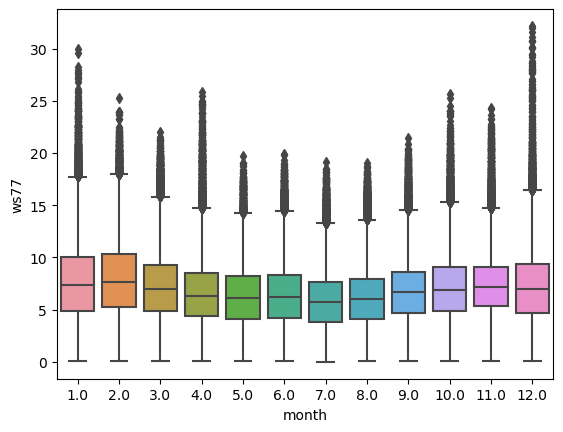

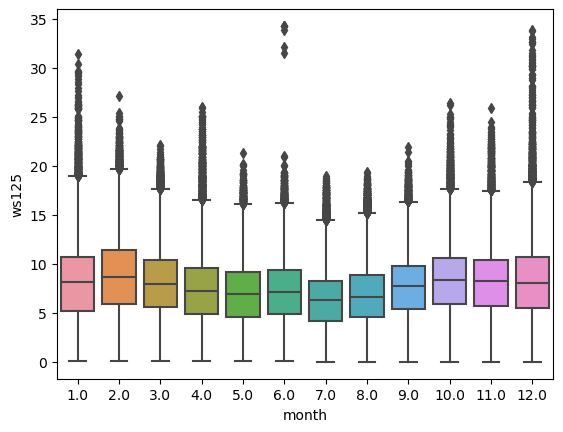

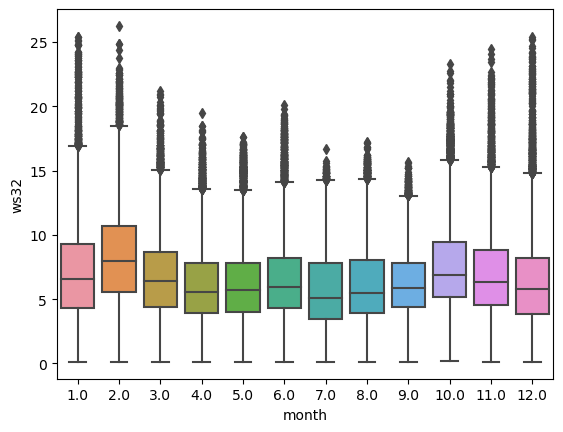

In [34]:
# From these box plots, we can see that there is quite a large amount of outliers throughout the year
# Comparing the ws77 and ws125, they seem to show very similar trend in wind speeds over the different months, but ws125 seems to show a stronger pattern
# with ws125 showing larger values (which is to be expected) and some additional extreme values in June

sns.boxplot(df_risoe_mast, x='month', y='ws77')
plt.show()
sns.boxplot(df_risoe_mast, x='month', y='ws125')
plt.show()
sns.boxplot(df_borglum_mast, x='month', y='ws32')
plt.show()

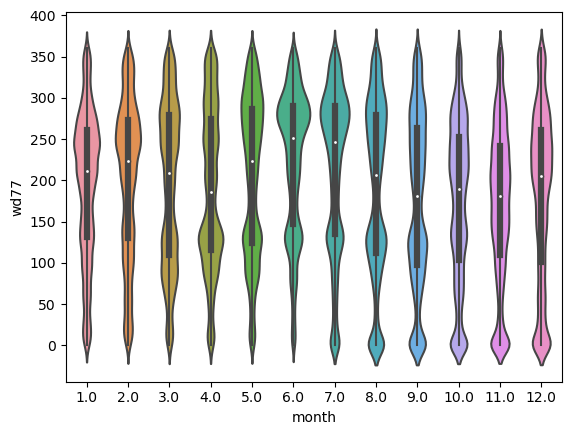

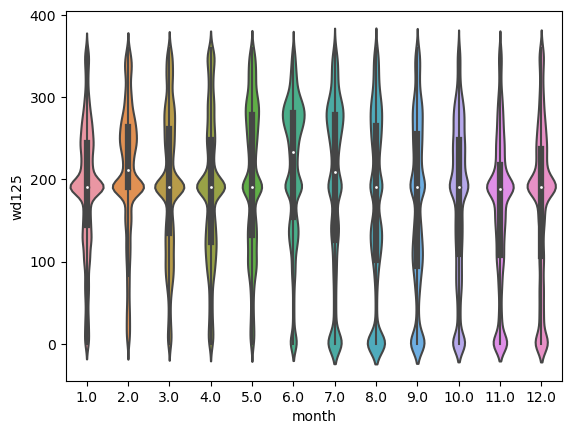

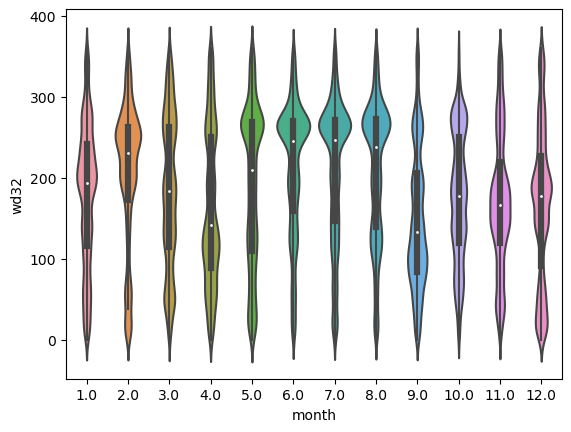

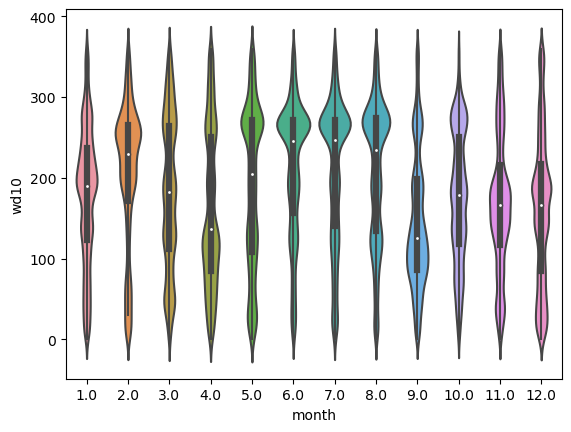

In [37]:
# Interestingly enough, the wind directions are completely different in the Risoe dataset for wd77 and wd125
# The Borglum dataset seems to have both columns showing similar results

sns.violinplot(df_risoe_mast, x='month', y='wd77')
plt.show()
sns.violinplot(df_risoe_mast, x='month', y='wd125')
plt.show()
sns.violinplot(df_borglum_mast, x='month', y='wd32')
plt.show()
sns.violinplot(df_borglum_mast, x='month', y='wd10')
plt.show()

## Meso

In [40]:
# Loading meso data
df_risoe_meso = pd.read_csv('Data/meso_Risoe.csv')
df_borglum_meso = pd.read_csv('Data/meso_Borglum.csv')

# Lowering column names to proper casing
df_risoe_meso.columns = map(str.lower, df_risoe_meso.columns)
df_borglum_meso.columns = map(str.lower, df_borglum_meso.columns)

display(df_risoe_meso.info())
display(df_borglum_meso.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204288 entries, 0 to 204287
Data columns (total 74 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamp   204288 non-null  object 
 1   hgt         204288 non-null  float64
 2   rho060      204288 non-null  float64
 3   rho080      204288 non-null  float64
 4   rho100      204288 non-null  float64
 5   rho120      204288 non-null  float64
 6   rho140      204288 non-null  float64
 7   rho160      204288 non-null  float64
 8   rho180      204288 non-null  float64
 9   rho200      204288 non-null  float64
 10  rho220      204288 non-null  float64
 11  tc060       204288 non-null  float64
 12  tc080       204288 non-null  float64
 13  tc100       204288 non-null  float64
 14  tc120       204288 non-null  float64
 15  tc140       204288 non-null  float64
 16  tc160       204288 non-null  float64
 17  tc180       204288 non-null  float64
 18  tc200       204288 non-null  float64
 19  tc

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204720 entries, 0 to 204719
Data columns (total 74 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamp   204720 non-null  object 
 1   hgt         204720 non-null  float64
 2   rho060      204720 non-null  float64
 3   rho080      204720 non-null  float64
 4   rho100      204720 non-null  float64
 5   rho120      204720 non-null  float64
 6   rho140      204720 non-null  float64
 7   rho160      204720 non-null  float64
 8   rho180      204720 non-null  float64
 9   rho200      204720 non-null  float64
 10  rho220      204720 non-null  float64
 11  tc060       204720 non-null  float64
 12  tc080       204720 non-null  float64
 13  tc100       204720 non-null  float64
 14  tc120       204720 non-null  float64
 15  tc140       204720 non-null  float64
 16  tc160       204720 non-null  float64
 17  tc180       204720 non-null  float64
 18  tc200       204720 non-null  float64
 19  tc

None

In [41]:
# As seen above, the timestamp is seen as a string instead of a timestamp, so we need to convert it before that

df_risoe_meso['timestamp'] = pd.to_datetime(df_risoe_meso['timestamp'])
df_borglum_meso['timestamp'] = pd.to_datetime(df_borglum_meso['timestamp'])

Years that these datasets cover:

In [46]:
print("Risoe:", df_risoe_meso.reset_index()['timestamp'].dt.year.unique())
print("Borglum:", df_borglum_meso.reset_index()['timestamp'].dt.year.unique())

print("Risoe:", df_risoe_mast.reset_index()['timestamp'].dt.year.unique())
print("Borglum:", df_borglum_mast.reset_index()['timestamp'].dt.year.unique())

Risoe: [2001 2002 2003 2006 2004 2005 2000 2012 2009 2014 2007 2008 2015 2016
 2018 2011 2017 2010 2020 2021 2022 2013 2023 2019]
Borglum: [2000 2001 2002 2005 2003 2007 2017 2006 2013 2012 2014 2015 2009 2019
 2010 2004 2011 2021 2016 2018 2023 2020 2008 2022]
Risoe: [1995. 1996.   nan 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007.]
Borglum: [1997. 1998.   nan 1999. 2000. 2001.]


In [133]:
print(df_risoe_mast['ws44_qc'].unique())
print(df_risoe_mast['ws77_qc'].unique())
print(df_risoe_mast['wd125_qc'].unique())

# As we can see, the qc columns don't contain any valuable information, so it is safe to drop these tables as well
columns_to_drop = [col for col in df_risoe_mast.columns if 'qc' in col]
df_risoe_mast = df_risoe_mast.drop(columns=columns_to_drop)

columns_to_drop = [col for col in df_borglum_mast.columns if 'qc' in col]
df_borglum_mast = df_borglum_mast.drop(columns=columns_to_drop)

[nan  0.]
[ 0. nan]
[ 0. nan]


In [134]:
display(df_risoe_mast.info())
display(df_borglum_mast.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628359 entries, 0 to 628358
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   time    628359 non-null  datetime64[ns]
 1   ws44    480818 non-null  float64       
 2   ws77    621607 non-null  float64       
 3   ws125   541705 non-null  float64       
 4   wd77    627811 non-null  float64       
 5   wd125   558830 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 28.8 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212279 entries, 0 to 212278
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   time    212279 non-null  datetime64[ns]
 1   ws32    211046 non-null  float64       
 2   ws20    198670 non-null  float64       
 3   ws10    206247 non-null  float64       
 4   wd10    212270 non-null  float64       
 5   wd32    204907 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 9.7 MB


None